## TP Data Mining

Dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

1. Organización y Contexto del Negocio
    - Organización: Una tienda minorista ficticia que vende una amplia gama de productos.
    - Contexto del Negocio: La tienda quiere comprender mejor el comportamiento y las preferencias de sus clientes para optimizar sus estrategias de marketing, mejorar la experiencia del cliente y aumentar las ventas.
2. Necesidad o Problema a Resolver:
    - La tienda necesita identificar patrones en el comportamiento de compra de los clientes.
    - Problemas específicos a resolver:
        - ¿Cuáles son los productos más populares y en qué temporadas se compran más?
        - ¿Qué métodos de pago prefieren los clientes?
        - ¿Cómo afectan los descuentos y los códigos promocionales a las compras?
        - ¿Existen grupos de clientes con comportamientos similares (clustering)?
3. Modelos de Datos Existentes
4. Análisis Exploratorio de Datos (EDA)
5. Decisiones de Diseño
    - Modelo de Datos: Utilizar un modelo tabular con las variables presentadas.
    - Tecnología: Usar Python con bibliotecas como Pandas, Scikit-learn y Seaborn para el análisis.
    - ETL (Extracción, Transformación y Carga): Procesar el dataset para limpieza de datos y transformación (codificación de variables categóricas, manejo de valores nulos, etc.).
6. Aplicación de Métodos de Data Mining
    1. Clustering
    2. Árbol de Decisión
    3. Canasta de Mercado

### 3. Modelos de Datos Existentes
| Variable | Descripción |
| ----------- | ----------- |
| Customer ID | Entero, clave primaria |
| Age | Entero |
| Item Purchased | Texto |
| Category | Texto |
| Purchase Amount (USD) | Flotante |
| Location | Texto |
| Size | Texto |
| Color | Texto |
| Season | Categórico (e.g., Winter, Spring, Summer, Fall) |
| Review Rating | Entero (1 a 5) |
| Subscription Status | Categórico (Yes/No) |
| Shipping Type | Texto (e.g., Standard, Express) |
| Discount Applied | Categórico (Yes/No) |
| Promo Code Used | Categórico (Yes/No) |
| Previous Purchases | Entero |
| Payment Method | Categórico (e.g., Credit Card, Debit Card, PayPal) |

### 4. Análisis Exploratorio de Datos (EDA)

In [208]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [203]:
# Cargamos el dataset y vemos los primeros registros
df = pd.read_csv('data.csv', index_col=0)

df = df.drop(['Subscription Status', 'Frequency of Purchases'], axis=1)

df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method
Customer ID,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,Yes,Yes,14,Venmo
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,Yes,Yes,2,Cash
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,Yes,Yes,23,Credit Card
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,Yes,Yes,49,PayPal
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,Yes,Yes,31,PayPal


In [178]:
# Vemos una descripción estadística de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3900.0,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.1,3.7,4.4,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.0,25.0,38.0,50.0


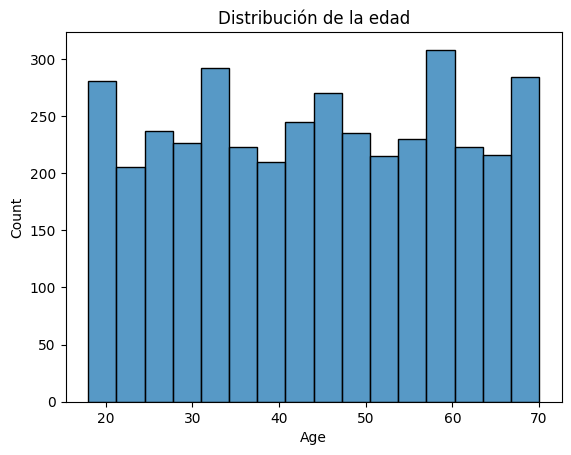

In [179]:
# Vemos la distribución de la edad
sns.histplot(df['Age'])
plt.title('Distribución de la edad')
plt.show()

### 6. Aplicación de Métodos de Data Mining
#### 6.1 Clustering

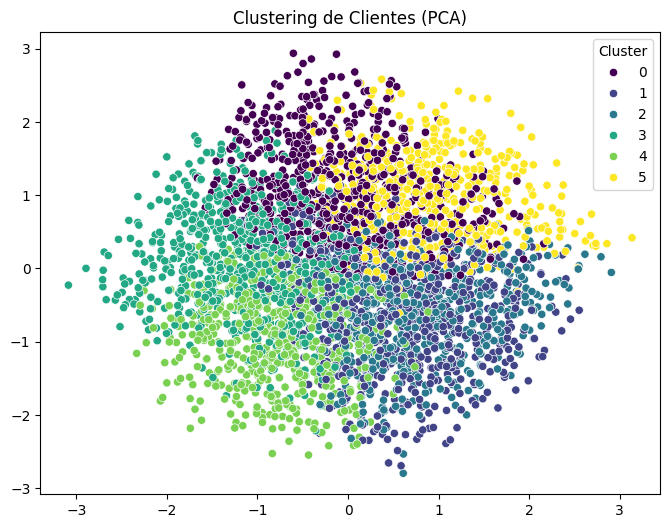

               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
Cluster                                                                     
0        58.550279              74.621508       4.329888           26.548883
1        33.645022              36.916306       4.243434           20.460317
2        33.965732              77.317757       3.243614           13.797508
3        48.065160              52.480053       3.141622           39.714096
4        56.729636              42.313692       3.337262           14.145581
5        30.663462              77.982692       4.256538           36.150000


In [225]:
# Seleccionar variables para clustering
clustering_data = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]

# Estandarizar los datos
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Clustering con K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Visualización de clusters en el espacio reducido por PCA
pca = PCA(n_components=2)
clustering_data_pca = pca.fit_transform(clustering_data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=clustering_data_pca[:, 0], y=clustering_data_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clustering de Clientes (PCA)')
plt.legend(title='Cluster')
plt.show()

# Análisis de características de los clústeres
cluster_means = df.groupby('Cluster')[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].mean()
print(cluster_means)

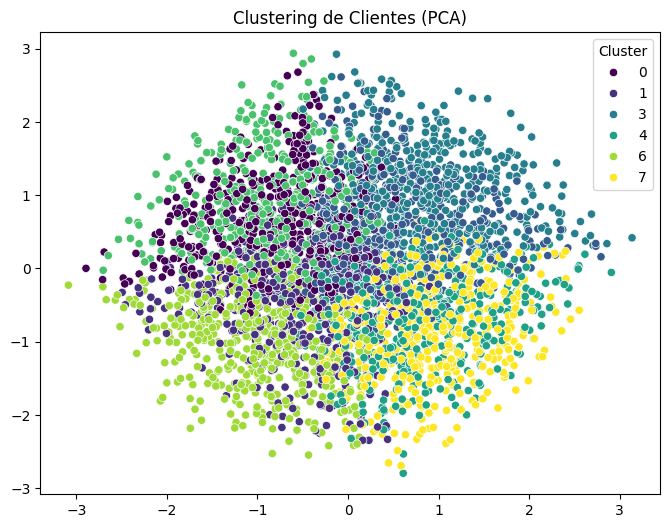

               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
Cluster                                                                     
0        56.248963              40.782158       4.250830           37.221992
1        32.882000              43.774000       3.167200           36.678000
2        55.211382              77.973577       4.302033           13.841463
3        32.374741              79.329193       4.363768           36.612836
4        32.179381              77.443299       3.185773           13.012371
5        56.653422              81.143488       3.267329           36.598234
6        56.614286              40.971429       3.140816           16.226531
7        32.040777              39.735922       4.279223           14.089320


In [ ]:
# Aplicar KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=8, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Visualización de clusters en el espacio reducido por PCA
pca = PCA(n_components=2)
clustering_data_pca = pca.fit_transform(clustering_data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=clustering_data_pca[:, 0], y=clustering_data_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clustering de Clientes (PCA)')
plt.legend(title='Cluster')
plt.show()

# Análisis de características de los clústeres
cluster_means = df.groupby('Cluster')[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].mean()
print(cluster_means)

| Cluster | Age | Purchase Amount (USD) | Review Rating | Previous Purchases |
| ------- | --- | --------------------- | ------------- | ------------------ |
| 0 | 56.25 | 40.78 | 4.25 | 37.22 |
| 1 | 32.88 | 43.77 | 3.17 | 36.68 |
| 2 | 55.21 | 77.97 | 4.30 | 13.84 |
| 3 | 32.37 | 79.33 | 4.36 | 36.61 |
| 4 | 32.18 | 77.44 | 3.19 | 13.01 |
| 5 | 56.65 | 81.14 | 3.27 | 36.60 |
| 6 | 56.61 | 40.97 | 3.14 | 16.23 |
| 7 | 32.04 | 39.74 | 4.28 | 14.09 |

CONCLUSIONES Y ESTRATEGIAS SEGUN CADA TIPO DE CLUSTER
... POR EJEMPLO JOVENES: MARKETING DIGITAL
... CLIENTES FIELES... ETC

#### 6.2 Árbol de Decisión

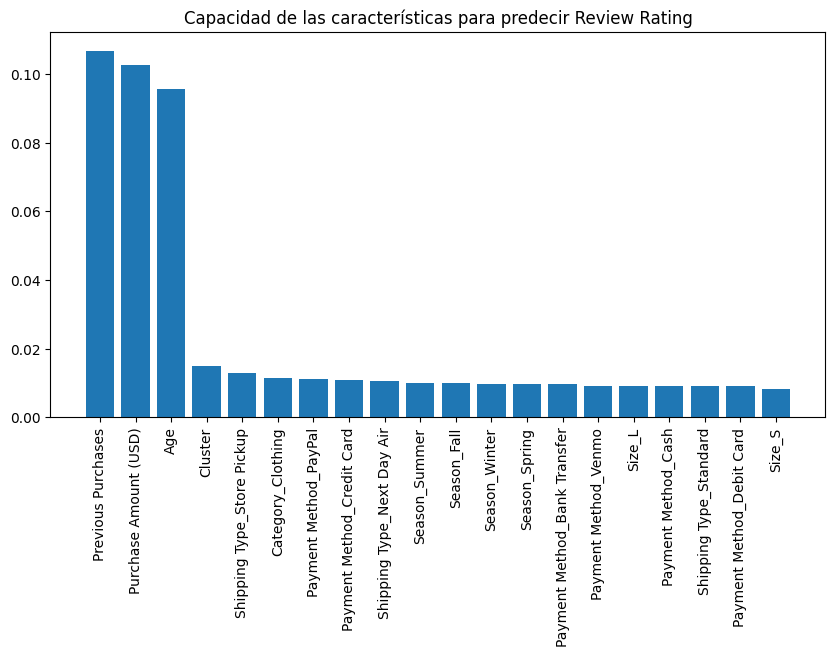

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Seleccionar características y variable objetivo
X = df.drop(['Review Rating'], axis=1)
y = df['Review Rating']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Importancia de las características
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

num_features = 20
plt.figure(figsize=(10, 5))
plt.bar(X.columns[indices[:num_features]], importances[indices[:num_features]])
plt.xticks(rotation=90)
plt.title('Capacidad de las características para predecir Review Rating')
plt.show()

#### 6.3 Análisis de Canasta de Mercado

In [226]:
from mlxtend.frequent_patterns import apriori, association_rules

# Seleccionar variables para reglas de asociación
association_data = df[['Category', 'Season', 'Discount Applied', 'Promo Code Used', 'Payment Method']]
association_data = pd.get_dummies(association_data)

# Aplicar reglas de asociación
frequent_itemsets = apriori(association_data, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Visualización de reglas
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Promo Code Used_No),(Discount Applied_No),0.570000,0.57,0.570000,1.0,1.754386,0.245100,inf,1.000000
1,(Discount Applied_No),(Promo Code Used_No),0.570000,0.57,0.570000,1.0,1.754386,0.245100,inf,1.000000
2,(Discount Applied_Yes),(Promo Code Used_Yes),0.430000,0.43,0.430000,1.0,2.325581,0.245100,inf,1.000000
3,(Promo Code Used_Yes),(Discount Applied_Yes),0.430000,0.43,0.430000,1.0,2.325581,0.245100,inf,1.000000
4,"(Promo Code Used_No, Category_Accessories)",(Discount Applied_No),0.178718,0.57,0.178718,1.0,1.754386,0.076849,inf,0.523572
5,"(Discount Applied_No, Category_Accessories)",(Promo Code Used_No),0.178718,0.57,0.178718,1.0,1.754386,0.076849,inf,0.523572
6,"(Discount Applied_Yes, Category_Accessories)",(Promo Code Used_Yes),0.139231,0.43,0.139231,1.0,2.325581,0.079362,inf,0.662198
7,"(Promo Code Used_Yes, Category_Accessories)",(Discount Applied_Yes),0.139231,0.43,0.139231,1.0,2.325581,0.079362,inf,0.662198
8,"(Promo Code Used_No, Category_Clothing)",(Discount Applied_No),0.257949,0.57,0.257949,1.0,1.754386,0.110918,inf,0.579475
9,"(Discount Applied_No, Category_Clothing)",(Promo Code Used_No),0.257949,0.57,0.257949,1.0,1.754386,0.110918,inf,0.579475
